In [1]:
import glob
import os
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
#from scipy import interp
from sklearn.metrics import roc_auc_score
from __future__ import print_function
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU
from keras.utils import to_categorical
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn import metrics
from sklearn.preprocessing import Normalizer
import h5py
from keras import callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# setting the path for joining multiple files
files = os.path.join("/content/drive/MyDrive/CICDDOS-2019","*.csv")

# list of merged files returned
files = glob.glob(files)

print("Resultant CSV after joining all CSV files at a particular location...");

# joining files with concat and read_csv
df = pd.concat(map(pd.read_csv, files), ignore_index=True)
df

Resultant CSV after joining all CSV files at a particular location...


,Timestamp,Source Port,Min Packet Length,Fwd Packet Length Min,Flow ID,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,...,Flow Bytes/s,Max Packet Length,Protocol,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd,Label
0,286951,660,229.0,229.0,357693,229.0,229.0,343.5,0,229.0,...,4.580000e+08,229.0,17,2.000000e+06,2.000000e+06,458.0,458,36967,1,DrDoS_NetBIOS
1,120152,858,229.0,229.0,740001,229.0,229.0,343.5,0,229.0,...,2.290000e+08,229.0,17,1.000000e+06,1.000000e+06,458.0,458,56327,1,DrDoS_NetBIOS
2,443287,593,229.0,229.0,187142,229.0,229.0,343.5,0,229.0,...,9.541667e+06,229.0,17,4.166667e+04,4.166667e+04,458.0,458,4928,1,DrDoS_NetBIOS
3,464880,648,229.0,229.0,308905,229.0,229.0,343.5,0,229.0,...,4.580000e+08,229.0,17,2.000000e+06,2.000000e+06,458.0,458,31629,1,DrDoS_NetBIOS
4,413201,931,229.0,229.0,866129,229.0,229.0,343.5,0,229.0,...,9.541667e+06,229.0,17,4.166667e+04,4.166667e+04,458.0,458,25819,1,DrDoS_NetBIOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515494,677847,62535,516.0,516.0,305543,516.0,516.0,645.0,0,516.0,...,6.879963e+02,516.0,17,1.333326e+00,1.333326e+00,2064.0,2064,19373,3,TFTP
2515495,677848,62587,516.0,516.0,319952,516.0,516.0,645.0,0,516.0,...,6.880069e+02,516.0,17,1.333347e+00,1.333347e+00,2064.0,2064,14160,3,TFTP
2515496,677849,62474,516.0,516.0,273029,516.0,516.0,774.0,0,516.0,...,5.160000e+08,516.0,17,1.000000e+06,1.000000e+06,1032.0,1032,27866,1,TFTP
2515497,677850,62468,516.0,516.0,263806,516.0,516.0,645.0,0,516.0,...,6.879858e+02,516.0,17,1.333306e+00,1.333306e+00,2064.0,2064,62947,3,TFTP


In [5]:
df.dtypes

,0
Timestamp,int64
Source Port,int64
Min Packet Length,float64
Fwd Packet Length Min,float64
Flow ID,int64
Packet Length Mean,float64
Fwd Packet Length Max,float64
Average Packet Size,float64
ACK Flag Count,int64
Avg Fwd Segment Size,float64


In [6]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through each column
for column in df.columns:
    # Check if the column dtype is 'object'
    if df[column].dtype == 'object':
        # Encode the values of the column and replace them in the DataFrame
        df[column] = label_encoder.fit_transform(df[column])

# Now all object columns are encoded as integers


In [7]:
df.dtypes

,0
Timestamp,int64
Source Port,int64
Min Packet Length,float64
Fwd Packet Length Min,float64
Flow ID,int64
Packet Length Mean,float64
Fwd Packet Length Max,float64
Average Packet Size,float64
ACK Flag Count,int64
Avg Fwd Segment Size,float64


In [8]:
df.head()

,Timestamp,Source Port,Min Packet Length,Fwd Packet Length Min,Flow ID,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,...,Flow Bytes/s,Max Packet Length,Protocol,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd,Label
0,286951,660,229.0,229.0,357693,229.0,229.0,343.5,0,229.0,...,4.580000e+08,229.0,17,2.000000e+06,2.000000e+06,458.0,458,36967,1,5
1,120152,858,229.0,229.0,740001,229.0,229.0,343.5,0,229.0,...,2.290000e+08,229.0,17,1.000000e+06,1.000000e+06,458.0,458,56327,1,5
2,443287,593,229.0,229.0,187142,229.0,229.0,343.5,0,229.0,...,9.541667e+06,229.0,17,4.166667e+04,4.166667e+04,458.0,458,4928,1,5
3,464880,648,229.0,229.0,308905,229.0,229.0,343.5,0,229.0,...,4.580000e+08,229.0,17,2.000000e+06,2.000000e+06,458.0,458,31629,1,5
4,413201,931,229.0,229.0,866129,229.0,229.0,343.5,0,229.0,...,9.541667e+06,229.0,17,4.166667e+04,4.166667e+04,458.0,458,25819,1,5


In [9]:
df.columns

Index([' Timestamp', ' Source Port', ' Min Packet Length',
       ' Fwd Packet Length Min', 'Flow ID', ' Packet Length Mean',
       ' Fwd Packet Length Max', ' Average Packet Size', ' ACK Flag Count',
       ' Avg Fwd Segment Size', ' Fwd Packet Length Mean', 'Flow Bytes/s',
       ' Max Packet Length', ' Protocol', 'Fwd Packets/s', ' Flow Packets/s',
       'Total Length of Fwd Packets', ' Subflow Fwd Bytes',
       ' Destination Port', ' act_data_pkt_fwd', ' Label'],
      dtype='object')

In [10]:
df.shape

(2515499, 21)

In [11]:
df.tail()

,Timestamp,Source Port,Min Packet Length,Fwd Packet Length Min,Flow ID,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,...,Flow Bytes/s,Max Packet Length,Protocol,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd,Label
2515494,677847,62535,516.0,516.0,305543,516.0,516.0,645.0,0,516.0,...,6.879963e+02,516.0,17,1.333326,1.333326,2064.0,2064,19373,3,10
2515495,677848,62587,516.0,516.0,319952,516.0,516.0,645.0,0,516.0,...,6.880069e+02,516.0,17,1.333347,1.333347,2064.0,2064,14160,3,10
2515496,677849,62474,516.0,516.0,273029,516.0,516.0,774.0,0,516.0,...,5.160000e+08,516.0,17,1000000.000000,1000000.000000,1032.0,1032,27866,1,10
2515497,677850,62468,516.0,516.0,263806,516.0,516.0,645.0,0,516.0,...,6.879858e+02,516.0,17,1.333306,1.333306,2064.0,2064,62947,3,10
2515498,677851,62466,516.0,516.0,249982,516.0,516.0,645.0,0,516.0,...,6.879872e+02,516.0,17,1.333308,1.333308,2064.0,2064,59622,3,10


In [12]:
# Assuming your original DataFrame is named 'original_df'
# You may already have this DataFrame populated from previous steps

# Drop missing values
df.dropna(inplace=True)

# Display the shape of the DataFrame after removing missing values
print("Shape of original_df after removing missing values:", df.shape)


Shape of original_df after removing missing values: (2515499, 21)


In [13]:
# Calculate the size of each chunk
chunk_size = len(df) // 4

# Divide the DataFrame into 4 chunks
df1 = df.iloc[:chunk_size]
df2 = df.iloc[chunk_size: 2 * chunk_size]
df3 = df.iloc[2 * chunk_size: 3 * chunk_size]
df4 = df.iloc[3 * chunk_size:]

# Display the shapes of each DataFrame
print("Shape of df1:", df1.shape)
print("Shape of df2:", df2.shape)
print("Shape of df3:", df3.shape)
print("Shape of df4:", df4.shape)


Shape of df1: (628874, 21)
Shape of df2: (628874, 21)
Shape of df3: (628874, 21)
Shape of df4: (628877, 21)


In [14]:
df1.head()

,Timestamp,Source Port,Min Packet Length,Fwd Packet Length Min,Flow ID,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,...,Flow Bytes/s,Max Packet Length,Protocol,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd,Label
0,286951,660,229.0,229.0,357693,229.0,229.0,343.5,0,229.0,...,4.580000e+08,229.0,17,2.000000e+06,2.000000e+06,458.0,458,36967,1,5
1,120152,858,229.0,229.0,740001,229.0,229.0,343.5,0,229.0,...,2.290000e+08,229.0,17,1.000000e+06,1.000000e+06,458.0,458,56327,1,5
2,443287,593,229.0,229.0,187142,229.0,229.0,343.5,0,229.0,...,9.541667e+06,229.0,17,4.166667e+04,4.166667e+04,458.0,458,4928,1,5
3,464880,648,229.0,229.0,308905,229.0,229.0,343.5,0,229.0,...,4.580000e+08,229.0,17,2.000000e+06,2.000000e+06,458.0,458,31629,1,5
4,413201,931,229.0,229.0,866129,229.0,229.0,343.5,0,229.0,...,9.541667e+06,229.0,17,4.166667e+04,4.166667e+04,458.0,458,25819,1,5


In [15]:
df2.head()

,Timestamp,Source Port,Min Packet Length,Fwd Packet Length Min,Flow ID,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,...,Flow Bytes/s,Max Packet Length,Protocol,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd,Label
628874,1039415,996,1472.0,1472.0,978411,1472.0,1472.0,2208.0,0,1472.0,...,9.813333e+08,1472.0,17,6.666667e+05,6.666667e+05,2944.0,2944,18542,1,6
628875,827111,882,1437.0,1437.0,781572,1437.0,1437.0,2155.5,0,1437.0,...,1.437000e+09,1437.0,17,1.000000e+06,1.000000e+06,2874.0,2874,56645,1,6
628876,883179,853,1472.0,1472.0,730634,1472.0,1472.0,2208.0,0,1472.0,...,1.472000e+09,1472.0,17,1.000000e+06,1.000000e+06,2944.0,2944,3275,1,6
628877,618330,739,1379.0,1379.0,533901,1379.0,1379.0,2068.5,0,1379.0,...,2.758000e+09,1379.0,17,2.000000e+06,2.000000e+06,2758.0,2758,38014,1,6
628878,875033,772,1472.0,1472.0,591252,1472.0,1472.0,2208.0,0,1472.0,...,1.472000e+09,1472.0,17,1.000000e+06,1.000000e+06,2944.0,2944,45476,1,6


In [16]:
df3.head()

,Timestamp,Source Port,Min Packet Length,Fwd Packet Length Min,Flow ID,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,...,Flow Bytes/s,Max Packet Length,Protocol,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd,Label
1257748,79603,729,1472.0,1472.0,562883,1472.0,1472.0,2208.0,0,1472.0,...,6.263830e+07,1472.0,17,4.255319e+04,4.255319e+04,2944.0,2944,25059,1,2
1257749,74594,900,1472.0,1472.0,603561,1472.0,1472.0,2208.0,0,1472.0,...,2.944000e+09,1472.0,17,2.000000e+06,2.000000e+06,2944.0,2944,18125,1,2
1257750,63166,757,1472.0,1472.0,569536,1472.0,1472.0,2208.0,0,1472.0,...,2.944000e+09,1472.0,17,2.000000e+06,2.000000e+06,2944.0,2944,63214,1,2
1257751,75043,531,1472.0,1472.0,332567,1472.0,1472.0,2208.0,0,1472.0,...,2.944000e+09,1472.0,17,2.000000e+06,2.000000e+06,2944.0,2944,12130,1,2
1257752,54280,987,1472.0,1472.0,629583,1472.0,1472.0,2208.0,0,1472.0,...,2.944000e+09,1472.0,17,2.000000e+06,2.000000e+06,2944.0,2944,22475,1,2


In [17]:
import pandas as pd
import numpy as np

def random_value_imputation(df, p=0.1):
    # Randomly select a subset of values to replace
    mask = np.random.choice([True, False], size=df.shape, p=[p, 1-p])
    # Generate random values to replace the selected subset
    replacements = np.random.choice(df.values.flatten(), size=df.shape)
    # Apply replacements to the dataframe
    noisy_df = df.mask(mask, replacements)
    return noisy_df

# Assuming df1 is your DataFrame
noisy_df = random_value_imputation(df1)

noisy_df['adversarial'] = 'Random Value Imputation'
print("Null Values:\n", noisy_df.isnull().sum())

noisy_df.head()


Null Values:
  Timestamp                     0
 Source Port                   0
 Min Packet Length             0
 Fwd Packet Length Min         0
Flow ID                        0
 Packet Length Mean            0
 Fwd Packet Length Max         0
 Average Packet Size           0
 ACK Flag Count                0
 Avg Fwd Segment Size          0
 Fwd Packet Length Mean        0
Flow Bytes/s                   0
 Max Packet Length             0
 Protocol                      0
Fwd Packets/s                  0
 Flow Packets/s                0
Total Length of Fwd Packets    0
 Subflow Fwd Bytes             0
 Destination Port              0
 act_data_pkt_fwd              0
 Label                         0
adversarial                    0
dtype: int64


,Timestamp,Source Port,Min Packet Length,Fwd Packet Length Min,Flow ID,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,...,Max Packet Length,Protocol,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd,Label,adversarial
0,286951.0,660.0,229.0,229.0,357693.0,229.0,229.0,343.5,0.0,229.0,...,229.0,17.0,2.000000e+06,3.611100e+04,4.580000e+02,4.580000e+02,36967.0,1.0,5.0,Random Value Imputation
1,120152.0,858.0,229.0,229.0,740001.0,229.0,229.0,343.5,330085.0,229.0,...,229.0,17.0,1.000000e+06,1.000000e+06,4.580000e+02,4.580000e+02,56327.0,1.0,5.0,Random Value Imputation
2,443287.0,593.0,229.0,229.0,187142.0,229.0,229.0,343.5,0.0,229.0,...,229.0,17.0,4.166667e+04,4.166667e+04,4.580000e+02,9.346939e+06,4928.0,1.0,5.0,Random Value Imputation
3,464880.0,648.0,229.0,229.0,308905.0,229.0,229.0,343.5,0.0,229.0,...,229.0,17.0,2.000000e+06,2.000000e+06,3.137012e+06,8.870000e+02,31629.0,1.0,5.0,Random Value Imputation
4,413201.0,931.0,229.0,876.0,866129.0,229.0,229.0,343.5,0.0,229.0,...,229.0,17.0,4.166667e+04,6.840000e+02,4.580000e+02,4.580000e+02,41798.0,1.0,5.0,Random Value Imputation


In [18]:
noisy_df['adversarial'].value_counts()

,count
adversarial,
Random Value Imputation,628874


In [19]:
import pandas as pd
import numpy as np


def random_outlier_injection(df, percent_outliers=0.1, outlier_range=(-1, 1)):
    num_outliers = int(percent_outliers * df.size)
    indices = np.random.choice(df.size, num_outliers, replace=False)
    df_flattened = df.to_numpy().flatten()
    df_flattened[indices] = np.random.uniform(outlier_range[0], outlier_range[1], num_outliers)
    return pd.DataFrame(df_flattened.reshape(df.shape), columns=df.columns)

# Generate adversarial attacks
outlier_df = random_outlier_injection(df2)
outlier_df['adversarial']= 'random_outlier_injection'
print("Null Values:\n", outlier_df.isnull().sum())
outlier_df.head()

Null Values:
  Timestamp                     0
 Source Port                   0
 Min Packet Length             0
 Fwd Packet Length Min         0
Flow ID                        0
 Packet Length Mean            0
 Fwd Packet Length Max         0
 Average Packet Size           0
 ACK Flag Count                0
 Avg Fwd Segment Size          0
 Fwd Packet Length Mean        0
Flow Bytes/s                   0
 Max Packet Length             0
 Protocol                      0
Fwd Packets/s                  0
 Flow Packets/s                0
Total Length of Fwd Packets    0
 Subflow Fwd Bytes             0
 Destination Port              0
 act_data_pkt_fwd              0
 Label                         0
adversarial                    0
dtype: int64


,Timestamp,Source Port,Min Packet Length,Fwd Packet Length Min,Flow ID,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,...,Max Packet Length,Protocol,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd,Label,adversarial
0,1.039415e+06,996.0,1472.0,1472.0,978411.0,-0.319552,1472.000000,2208.000000,0.0,1472.000000,...,1472.0,17.0,6.666667e+05,6.666667e+05,2944.0,-0.356510,18542.000000,1.0,6.0,random_outlier_injection
1,8.271110e+05,882.0,1437.0,1437.0,781572.0,1437.000000,-0.056167,2155.500000,0.0,1437.000000,...,1437.0,17.0,1.000000e+06,1.000000e+06,2874.0,2874.000000,-0.988511,1.0,6.0,random_outlier_injection
2,-7.617035e-01,853.0,1472.0,1472.0,730634.0,1472.000000,1472.000000,-0.390961,0.0,-0.615894,...,1472.0,17.0,1.000000e+06,1.000000e+06,2944.0,-0.574811,3275.000000,1.0,6.0,random_outlier_injection
3,-3.550922e-01,739.0,1379.0,1379.0,533901.0,1379.000000,1379.000000,2068.500000,0.0,1379.000000,...,1379.0,17.0,2.000000e+06,2.000000e+06,2758.0,2758.000000,-0.382298,1.0,6.0,random_outlier_injection
4,8.750330e+05,772.0,1472.0,1472.0,591252.0,1472.000000,-0.450583,2208.000000,0.0,-0.923163,...,1472.0,17.0,-2.527639e-01,1.000000e+06,2944.0,2944.000000,45476.000000,1.0,6.0,random_outlier_injection


In [20]:
outlier_df['adversarial'].value_counts()

,count
adversarial,
random_outlier_injection,628874


In [21]:
import pandas as pd
import numpy as np

def data_perturbation(df, perturbation_factor=0.1):
    numeric_df = df.select_dtypes(include=[np.number])
    perturbation = np.random.uniform(-perturbation_factor, perturbation_factor, numeric_df.shape)
    perturbed_numeric_df = numeric_df + perturbation

    non_numeric_df = df.select_dtypes(exclude=[np.number])
    perturbed_df = pd.concat([perturbed_numeric_df, non_numeric_df], axis=1)

    return perturbed_df

# Assuming df3 is your DataFrame
df_data_perturbation = data_perturbation(df3)
df_data_perturbation['adversarial'] = 'Perturbation Injection'
print(df_data_perturbation.head())
print(df_data_perturbation['adversarial'].value_counts())


            Timestamp   Source Port   Min Packet Length  \
1257748  79602.992081    729.005117         1471.999684   
1257749  74593.942561    900.066656         1472.020095   
1257750  63165.939690    756.951419         1471.970414   
1257751  75042.974852    530.925080         1472.012226   
1257752  54279.907028    987.056382         1472.001331   

          Fwd Packet Length Min        Flow ID   Packet Length Mean  \
1257748             1472.040597  562883.035401          1471.967523   
1257749             1471.990726  603561.001505          1472.030881   
1257750             1472.003232  569535.973841          1472.060221   
1257751             1472.086602  332567.055113          1472.000273   
1257752             1471.950379  629583.034463          1472.010873   

          Fwd Packet Length Max   Average Packet Size   ACK Flag Count  \
1257748             1472.078717           2207.985271        -0.048830   
1257749             1472.023301           2207.916293         0.005815

In [22]:
df_data_perturbation['adversarial'].value_counts()

,count
adversarial,
Perturbation Injection,628874


In [23]:
df4['adversarial']='benign'
df4.head()

/tmp/ipython-input-2589826977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['adversarial']='benign'


,Timestamp,Source Port,Min Packet Length,Fwd Packet Length Min,Flow ID,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,...,Max Packet Length,Protocol,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd,Label,adversarial
1886622,16489,42877,375.0,375.0,108220,375.0,375.0,562.5,0,375.0,...,375.0,17,1.000000e+06,1.000000e+06,750.0,750,32700,1,7,benign
1886623,25361,50957,330.0,330.0,150843,353.6,389.0,442.0,0,359.5,...,389.0,17,3.784152e+01,3.784152e+01,1438.0,1438,19129,3,7,benign
1886624,451,661,1472.0,1472.0,397980,1472.0,1472.0,2208.0,0,1472.0,...,1472.0,17,1.000000e+06,1.000000e+06,2944.0,2944,43938,1,7,benign
1886625,3308,33922,375.0,375.0,67832,375.0,375.0,562.5,0,375.0,...,375.0,17,2.000000e+06,2.000000e+06,750.0,750,26422,1,7,benign
1886626,35122,40276,401.0,401.0,96408,401.0,401.0,601.5,0,401.0,...,401.0,17,2.000000e+06,2.000000e+06,802.0,802,57759,1,7,benign


In [24]:
# Merge the data frames
df_merged = pd.concat([df4, noisy_df, outlier_df, df_data_perturbation], axis=0)
df_merged.reset_index(drop=True, inplace=True)
df_merged.head()

,Timestamp,Source Port,Min Packet Length,Fwd Packet Length Min,Flow ID,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,...,Max Packet Length,Protocol,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd,Label,adversarial
0,16489.0,42877.0,375.0,375.0,108220.0,375.0,375.0,562.5,0.0,375.0,...,375.0,17.0,1.000000e+06,1.000000e+06,750.0,750.0,32700.0,1.0,7.0,benign
1,25361.0,50957.0,330.0,330.0,150843.0,353.6,389.0,442.0,0.0,359.5,...,389.0,17.0,3.784152e+01,3.784152e+01,1438.0,1438.0,19129.0,3.0,7.0,benign
2,451.0,661.0,1472.0,1472.0,397980.0,1472.0,1472.0,2208.0,0.0,1472.0,...,1472.0,17.0,1.000000e+06,1.000000e+06,2944.0,2944.0,43938.0,1.0,7.0,benign
3,3308.0,33922.0,375.0,375.0,67832.0,375.0,375.0,562.5,0.0,375.0,...,375.0,17.0,2.000000e+06,2.000000e+06,750.0,750.0,26422.0,1.0,7.0,benign
4,35122.0,40276.0,401.0,401.0,96408.0,401.0,401.0,601.5,0.0,401.0,...,401.0,17.0,2.000000e+06,2.000000e+06,802.0,802.0,57759.0,1.0,7.0,benign


In [25]:
df_merged['adversarial'].value_counts()

,count
adversarial,
benign,628877
Random Value Imputation,628874
random_outlier_injection,628874
Perturbation Injection,628874


In [26]:
# Drop duplicate rows
df_no_duplicates = df_merged.drop_duplicates()

# Check for duplicates
duplicate_rows = df_no_duplicates[df_no_duplicates.duplicated()]

if duplicate_rows.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows:")
    print(duplicate_rows)

No duplicate rows found.


In [27]:
df_merged['adversarial'].unique()

array(['benign', 'Random Value Imputation', 'random_outlier_injection',
       'Perturbation Injection'], dtype=object)

In [28]:
print("Null Values:\n", df_merged.isnull().sum())

Null Values:
  Timestamp                     0
 Source Port                   0
 Min Packet Length             0
 Fwd Packet Length Min         0
Flow ID                        0
 Packet Length Mean            0
 Fwd Packet Length Max         0
 Average Packet Size           0
 ACK Flag Count                0
 Avg Fwd Segment Size          0
 Fwd Packet Length Mean        0
Flow Bytes/s                   0
 Max Packet Length             0
 Protocol                      0
Fwd Packets/s                  0
 Flow Packets/s                0
Total Length of Fwd Packets    0
 Subflow Fwd Bytes             0
 Destination Port              0
 act_data_pkt_fwd              0
 Label                         0
adversarial                    0
dtype: int64


In [29]:
df_merged.to_csv('Adverserial Attacks on Binary',index=False)

In [30]:
df_merged.to_csv('Adverserial Attacks on Binary.csv',index=False)

In [31]:
data = pd.read_csv("/content/Adverserial Attacks on Binary.csv")  # Replace with the actual file path

In [ ]:
data['adversarial'].value_counts()

,count
adversarial,
benign,628877
Random Value Imputation,628874
random_outlier_injection,628874
Perturbation Injection,628874


In [ ]:
data.shape

(2515499, 22)

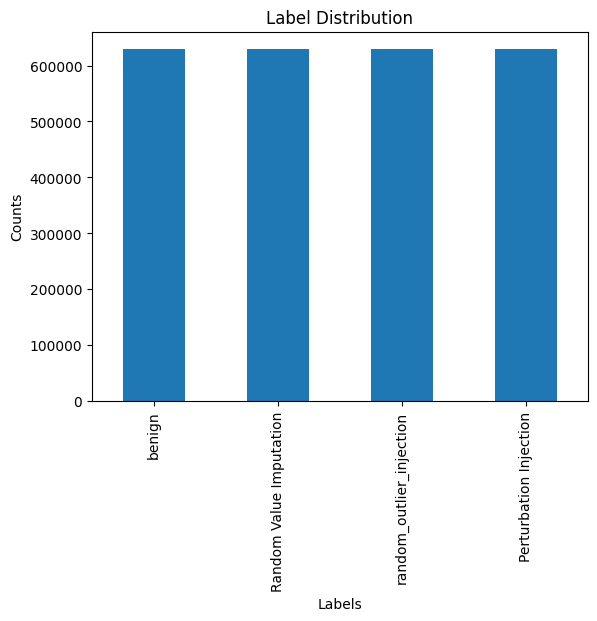

In [ ]:
label_counts = data['adversarial'].value_counts()
label_counts.plot(kind='bar')
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Label Distribution')
plt.show()

In [ ]:
data.tail()

,Timestamp,Source Port,Min Packet Length,Fwd Packet Length Min,Flow ID,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,...,Max Packet Length,Protocol,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd,Label,adversarial
2515494,11521.041622,49768.063498,321.048589,320.908374,144551.973179,344.049862,393.063321,401.486232,0.053944,348.040850,...,392.934388,16.958211,2.823168e+01,2.810676e+01,2088.052856,2087.937974,28890.063552,5.007242,7.094901,Perturbation Injection
2515495,24244.083496,55085.053251,382.945407,382.987823,174891.066635,382.959608,383.061464,574.572005,0.035162,382.952545,...,383.026061,16.957312,9.999999e+05,1.000000e+06,765.999655,765.912868,4259.975351,1.004727,7.072338,Perturbation Injection
2515496,25698.008895,59547.909135,321.917255,322.088793,222773.087995,339.408668,373.957671,396.043157,-0.059028,342.275499,...,373.983427,17.058311,2.544915e+01,2.545613e+01,2054.041020,2053.989411,32514.085781,4.995416,7.087858,Perturbation Injection
2515497,19613.031040,41954.921921,329.927220,330.035646,104088.002511,345.545070,368.916896,432.005264,0.019413,349.411853,...,368.912193,16.948556,3.657656e+01,3.672055e+01,1397.947810,1398.098669,50492.906878,3.074722,7.018924,Perturbation Injection
2515498,11762.994579,35247.018774,382.969398,383.092433,73617.938149,382.908496,383.082329,574.441954,-0.072408,382.990470,...,383.077096,16.970155,2.000000e+06,2.000000e+06,766.079795,766.006674,8390.018303,1.025333,6.903235,Perturbation Injection


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through each column
for column in data.columns:
    # Check if the column dtype is 'object'
    if data[column].dtype == 'object':
        # Encode the values of the column and replace them in the DataFrame
        data[column] = label_encoder.fit_transform(data[column])

# Now all object columns are encoded as integers

In [ ]:
data.tail()

,Timestamp,Source Port,Min Packet Length,Fwd Packet Length Min,Flow ID,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,...,Max Packet Length,Protocol,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd,Label,adversarial
2515494,11521.041622,49768.063498,321.048589,320.908374,144551.973179,344.049862,393.063321,401.486232,0.053944,348.040850,...,392.934388,16.958211,2.823168e+01,2.810676e+01,2088.052856,2087.937974,28890.063552,5.007242,7.094901,0
2515495,24244.083496,55085.053251,382.945407,382.987823,174891.066635,382.959608,383.061464,574.572005,0.035162,382.952545,...,383.026061,16.957312,9.999999e+05,1.000000e+06,765.999655,765.912868,4259.975351,1.004727,7.072338,0
2515496,25698.008895,59547.909135,321.917255,322.088793,222773.087995,339.408668,373.957671,396.043157,-0.059028,342.275499,...,373.983427,17.058311,2.544915e+01,2.545613e+01,2054.041020,2053.989411,32514.085781,4.995416,7.087858,0
2515497,19613.031040,41954.921921,329.927220,330.035646,104088.002511,345.545070,368.916896,432.005264,0.019413,349.411853,...,368.912193,16.948556,3.657656e+01,3.672055e+01,1397.947810,1398.098669,50492.906878,3.074722,7.018924,0
2515498,11762.994579,35247.018774,382.969398,383.092433,73617.938149,382.908496,383.082329,574.441954,-0.072408,382.990470,...,383.077096,16.970155,2.000000e+06,2.000000e+06,766.079795,766.006674,8390.018303,1.025333,6.903235,0


In [ ]:
data.shape

(2515499, 22)

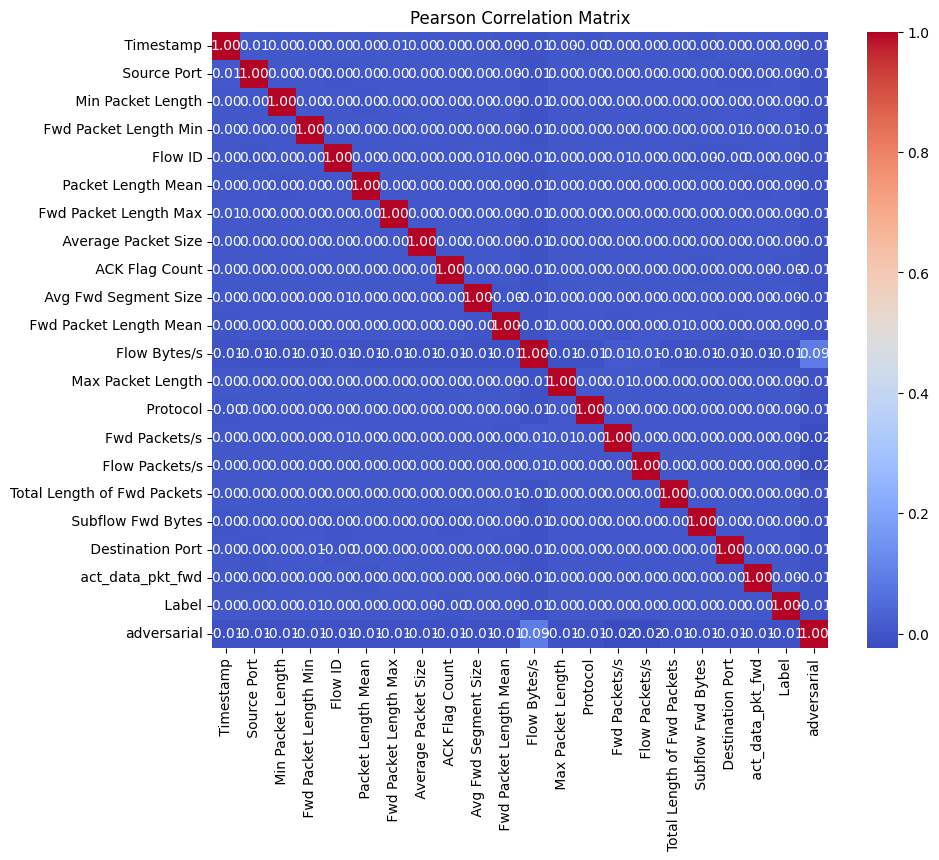

In [ ]:
import seaborn as sns
# Create DataFrame
df = pd.DataFrame(data)


# Calculate Pearson correlation
correlation_matrix = df.corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Pearson Correlation Matrix')
plt.show()


In [ ]:
# Identify highly correlated features
threshold = 0.8  # Define threshold for high correlation
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

print("Highly correlated features to remove:", highly_correlated_features)

# Remove highly correlated features
df_cleaned = df.drop(columns=highly_correlated_features)

print("\nDataFrame after removing highly correlated features:")
print(df_cleaned)

Highly correlated features to remove: set()

DataFrame after removing highly correlated features:
            Timestamp   Source Port   Min Packet Length  \
0        16489.000000  42877.000000          375.000000   
1        25361.000000  50957.000000          330.000000   
2          451.000000    661.000000         1472.000000   
3         3308.000000  33922.000000          375.000000   
4        35122.000000  40276.000000          401.000000   
...               ...           ...                 ...   
2515494  11521.041622  49768.063498          321.048589   
2515495  24244.083496  55085.053251          382.945407   
2515496  25698.008895  59547.909135          321.917255   
2515497  19613.031040  41954.921921          329.927220   
2515498  11762.994579  35247.018774          382.969398   

          Fwd Packet Length Min        Flow ID   Packet Length Mean  \
0                    375.000000  108220.000000           375.000000   
1                    330.000000  150843.000000     

In [ ]:
df_cleaned.shape

(2515499, 22)

In [ ]:
df_cleaned.head()

,Timestamp,Source Port,Min Packet Length,Fwd Packet Length Min,Flow ID,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,...,Max Packet Length,Protocol,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd,Label,adversarial
0,16489.0,42877.0,375.0,375.0,108220.0,375.0,375.0,562.5,0.0,375.0,...,375.0,17.0,1.000000e+06,1.000000e+06,750.0,750.0,32700.0,1.0,7.0,2
1,25361.0,50957.0,330.0,330.0,150843.0,353.6,389.0,442.0,0.0,359.5,...,389.0,17.0,3.784152e+01,3.784152e+01,1438.0,1438.0,19129.0,3.0,7.0,2
2,451.0,661.0,1472.0,1472.0,397980.0,1472.0,1472.0,2208.0,0.0,1472.0,...,1472.0,17.0,1.000000e+06,1.000000e+06,2944.0,2944.0,43938.0,1.0,7.0,2
3,3308.0,33922.0,375.0,375.0,67832.0,375.0,375.0,562.5,0.0,375.0,...,375.0,17.0,2.000000e+06,2.000000e+06,750.0,750.0,26422.0,1.0,7.0,2
4,35122.0,40276.0,401.0,401.0,96408.0,401.0,401.0,601.5,0.0,401.0,...,401.0,17.0,2.000000e+06,2.000000e+06,802.0,802.0,57759.0,1.0,7.0,2


In [ ]:
X = df_cleaned.drop("adversarial", axis=1)
y = df_cleaned["adversarial"]

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
num_classes = len(label_encoder.classes_)
print(num_classes)

4


In [ ]:
X

,Timestamp,Source Port,Min Packet Length,Fwd Packet Length Min,Flow ID,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,...,Flow Bytes/s,Max Packet Length,Protocol,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd,Label
0,16489.000000,42877.000000,375.000000,375.000000,108220.000000,375.000000,375.000000,562.500000,0.000000,375.000000,...,3.750000e+08,375.000000,17.000000,1.000000e+06,1.000000e+06,750.000000,750.000000,32700.000000,1.000000,7.000000
1,25361.000000,50957.000000,330.000000,330.000000,150843.000000,353.600000,389.000000,442.000000,0.000000,359.500000,...,1.360403e+04,389.000000,17.000000,3.784152e+01,3.784152e+01,1438.000000,1438.000000,19129.000000,3.000000,7.000000
2,451.000000,661.000000,1472.000000,1472.000000,397980.000000,1472.000000,1472.000000,2208.000000,0.000000,1472.000000,...,1.472000e+09,1472.000000,17.000000,1.000000e+06,1.000000e+06,2944.000000,2944.000000,43938.000000,1.000000,7.000000
3,3308.000000,33922.000000,375.000000,375.000000,67832.000000,375.000000,375.000000,562.500000,0.000000,375.000000,...,7.500000e+08,375.000000,17.000000,2.000000e+06,2.000000e+06,750.000000,750.000000,26422.000000,1.000000,7.000000
4,35122.000000,40276.000000,401.000000,401.000000,96408.000000,401.000000,401.000000,601.500000,0.000000,401.000000,...,8.020000e+08,401.000000,17.000000,2.000000e+06,2.000000e+06,802.000000,802.000000,57759.000000,1.000000,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515494,11521.041622,49768.063498,321.048589,320.908374,144551.973179,344.049862,393.063321,401.486232,0.053944,348.040850,...,9.798453e+03,392.934388,16.958211,2.823168e+01,2.810676e+01,2088.052856,2087.937974,28890.063552,5.007242,7.094901
2515495,24244.083496,55085.053251,382.945407,382.987823,174891.066635,382.959608,383.061464,574.572005,0.035162,382.952545,...,3.830000e+08,383.026061,16.957312,9.999999e+05,1.000000e+06,765.999655,765.912868,4259.975351,1.004727,7.072338
2515496,25698.008895,59547.909135,321.917255,322.088793,222773.087995,339.408668,373.957671,396.043157,-0.059028,342.275499,...,8.709707e+03,373.983427,17.058311,2.544915e+01,2.545613e+01,2054.041020,2053.989411,32514.085781,4.995416,7.087858
2515497,19613.031040,41954.921921,329.927220,330.035646,104088.002511,345.545070,368.916896,432.005264,0.019413,349.411853,...,1.281123e+04,368.912193,16.948556,3.657656e+01,3.672055e+01,1397.947810,1398.098669,50492.906878,3.074722,7.018924


In [ ]:
df_cleaned.head()

,Timestamp,Source Port,Min Packet Length,Fwd Packet Length Min,Flow ID,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,...,Max Packet Length,Protocol,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd,Label,adversarial
0,16489.0,42877.0,375.0,375.0,108220.0,375.0,375.0,562.5,0.0,375.0,...,375.0,17.0,1.000000e+06,1.000000e+06,750.0,750.0,32700.0,1.0,7.0,2
1,25361.0,50957.0,330.0,330.0,150843.0,353.6,389.0,442.0,0.0,359.5,...,389.0,17.0,3.784152e+01,3.784152e+01,1438.0,1438.0,19129.0,3.0,7.0,2
2,451.0,661.0,1472.0,1472.0,397980.0,1472.0,1472.0,2208.0,0.0,1472.0,...,1472.0,17.0,1.000000e+06,1.000000e+06,2944.0,2944.0,43938.0,1.0,7.0,2
3,3308.0,33922.0,375.0,375.0,67832.0,375.0,375.0,562.5,0.0,375.0,...,375.0,17.0,2.000000e+06,2.000000e+06,750.0,750.0,26422.0,1.0,7.0,2
4,35122.0,40276.0,401.0,401.0,96408.0,401.0,401.0,601.5,0.0,401.0,...,401.0,17.0,2.000000e+06,2.000000e+06,802.0,802.0,57759.0,1.0,7.0,2


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

In [ ]:
X_train

,Timestamp,Source Port,Min Packet Length,Fwd Packet Length Min,Flow ID,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,...,Flow Bytes/s,Max Packet Length,Protocol,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd,Label
2145069,166396.072635,61849.941685,405.073009,404.982027,438049.989180,405.078260,404.919319,607.510316,0.015160,404.944048,...,8.100000e+08,404.923434,17.090335,2.000000e+06,2.000000e+06,810.050863,809.965782,13377.982469,0.991182,2.957373
1998285,303092.012355,19761.007585,478.041282,478.045171,77894.965129,477.937212,478.019464,716.941013,0.064640,477.926428,...,9.560000e+08,478.077376,16.901008,2.000000e+06,2.000000e+06,955.984284,955.904207,8882.090954,1.017730,3.082492
1402257,771505.000000,568.000000,1472.000000,1472.000000,142211.000000,1472.000000,1472.000000,2208.000000,0.000000,1472.000000,...,9.813333e+08,1472.000000,17.000000,6.666667e+05,6.666667e+05,2944.000000,2944.000000,15927.000000,0.883725,6.000000
368794,418191.000000,62527.000000,516.000000,516.000000,303581.000000,516.000000,516.000000,645.000000,0.000000,516.000000,...,6.877870e+02,516.000000,17.000000,1.332921e+00,1.332921e+00,2064.000000,2064.000000,9557.000000,3.000000,10.000000
1745401,95516.000000,41225.000000,0.000000,0.000000,48505.000000,0.000000,0.000000,-0.406406,-0.561345,0.000000,...,0.000000e+00,0.000000,6.000000,2.066677e-01,2.066677e-01,0.000000,0.000000,41225.000000,0.000000,11.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,159811.000000,22628.000000,0.000000,0.000000,35358.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000e+00,0.000000,6.000000,2.000000e+06,2.000000e+06,0.000000,0.000000,27462.000000,0.000000,10.000000
1692743,14735.000000,39264.000000,383.000000,-0.375095,41956.000000,383.000000,383.000000,574.500000,0.000000,383.000000,...,7.660000e+08,383.000000,17.000000,2.000000e+06,2.000000e+06,0.714252,766.000000,14688.000000,1.000000,8.000000
2356330,616292.984719,48052.968087,483.011186,483.088091,290366.995364,482.907800,482.900624,724.593488,0.039379,482.935220,...,4.830000e+08,482.991440,17.060158,1.000000e+06,1.000000e+06,966.090241,965.931717,55374.072831,1.056238,3.000269
2229084,256045.941230,34890.928996,660.002738,660.076999,192164.022016,659.926774,660.092764,990.074532,0.081320,659.918536,...,1.320000e+09,660.013814,17.077530,2.000000e+06,2.000000e+06,1319.955858,1319.945053,24319.097684,1.018643,2.991506


In [ ]:
X_train.shape

(1760849, 21)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Convert the data to TensorFlow tensors
import tensorflow as tf
X_train_tensor = tf.constant(X_train_scaled, dtype=tf.float32)
y_train_tensor = tf.constant(y_train, dtype=tf.int32)
X_test_tensor = tf.constant(X_test_scaled, dtype=tf.float32)
y_test_tensor = tf.constant(y_test, dtype=tf.int32)

In [ ]:
!pip install foolbox

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 19.2 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import numpy as np
import foolbox as fb

# Define the modelimport tensorflow as tf
import numpy as np
import foolbox as fb

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Assuming num_classes is defined
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_tensor, y_train_tensor, epochs=10, batch_size=62, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_tensor, y_test_tensor)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Use the Foolbox library to apply the DeepFool attack
# Convert the Keras model to a Foolbox model
fmodel = fb.TensorFlowModel(model, bounds=(0, 1))

# Create an instance of the DeepFool attack
attack = fb.attacks.DeepFool()

# Choose a sample to attack
X_sample = X_test_tensor[:10]  # Take the first 10 samples from the test set
y_sample = y_test_tensor[:10]

# Run the DeepFool attack
adversarials = attack(fmodel, X_sample, y_sample)

# Evaluate the adversarial examples
adversarial_preds = model.predict(adversarials)
adversarial_accuracy = np.mean(np.argmax(adversarial_preds, axis=1) == y_sample)

print("Adversarial Accuracy:", adversarial_accuracy)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Assuming num_classes is defined
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_tensor, y_train_tensor, epochs=10, batch_size=62, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_tensor, y_test_tensor)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Use the Foolbox library to apply the DeepFool attack
# Convert the Keras model to a Foolbox model
fmodel = fb.TensorFlowModel(model, bounds=(0, 1))

# Create an instance of the DeepFool attack
attack = fb.attacks.DeepFoolAttack()

# Choose a sample to attack
X_sample = X_test_tensor[:10]  # Take the first 10 samples from the test set
y_sample = y_test_tensor[:10]

# Run the DeepFool attack
adversarials = attack(fmodel, X_sample, y_sample)

# Evaluate the adversarial examples
adversarial_preds = model.predict(adversarials)
adversarial_accuracy = np.mean(np.argmax(adversarial_preds, axis=1) == y_sample)

print("Adversarial Accuracy:", adversarial_accuracy)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
22721/22721 ━━━━━━━━━━━━━━━━━━━━ 88s 4ms/step - accuracy: 0.8426 - loss: 0.4301 - val_accuracy: 0.9190 - val_loss: 0.2251
Epoch 2/10
22721/22721 ━━━━━━━━━━━━━━━━━━━━ 82s 4ms/step - accuracy: 0.9161 - loss: 0.2260 - val_accuracy: 0.9272 - val_loss: 0.1987
Epoch 3/10
22721/22721 ━━━━━━━━━━━━━━━━━━━━ 133s 3ms/step - accuracy: 0.9286 - loss: 0.1951 - val_accuracy: 0.9488 - val_loss: 0.1538
Epoch 4/10
22721/22721 ━━━━━━━━━━━━━━━━━━━━ 90s 4ms/step - accuracy: 0.9388 - loss: 0.1708 - val_accuracy: 0.9586 - val_loss: 0.1271
Epoch 5/10
22721/22721 ━━━━━━━━━━━━━━━━━━━━ 83s 4ms/step - accuracy: 0.9467 - loss: 0.1522 - val_accuracy: 0.9589 - val_loss: 0.1230
Epoch 6/10
22721/22721 ━━━━━━━━━━━━━━━━━━━━ 82s 4ms/step - accuracy: 0.9522 - loss: 0.1396 - val_accuracy: 0.9372 - val_loss: 0.1466
Epoch 7/10
22721/22721 ━━━━━━━━━━━━━━━━━━━━ 75s 3ms/step - accuracy: 0.9548 - loss: 0.1332 - val_accuracy: 0.9603 - val_loss: 0.1171
Epoch 8/10
22721/22721 ━━━━━━━━━━━━━━━━━━━━ 77s 3ms/step - accuracy:

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Test Loss: 0.1036582738161087
Test Accuracy: 0.9656701683998108


AttributeError: module 'foolbox.attacks' has no attribute 'DeepFool'

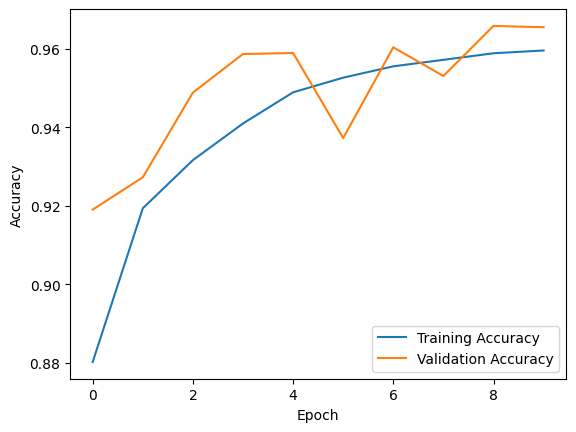

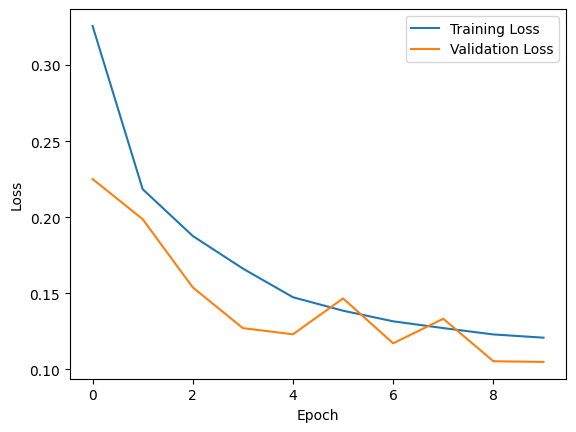

23583/23583 ━━━━━━━━━━━━━━━━━━━━ 66s 3ms/step - accuracy: 0.9655 - loss: 0.1040
Test Loss: 0.1036582738161087
Test Accuracy: 0.9656701683998108


In [ ]:
# Train the model


# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_tensor, y_test_tensor)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


23583/23583 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step


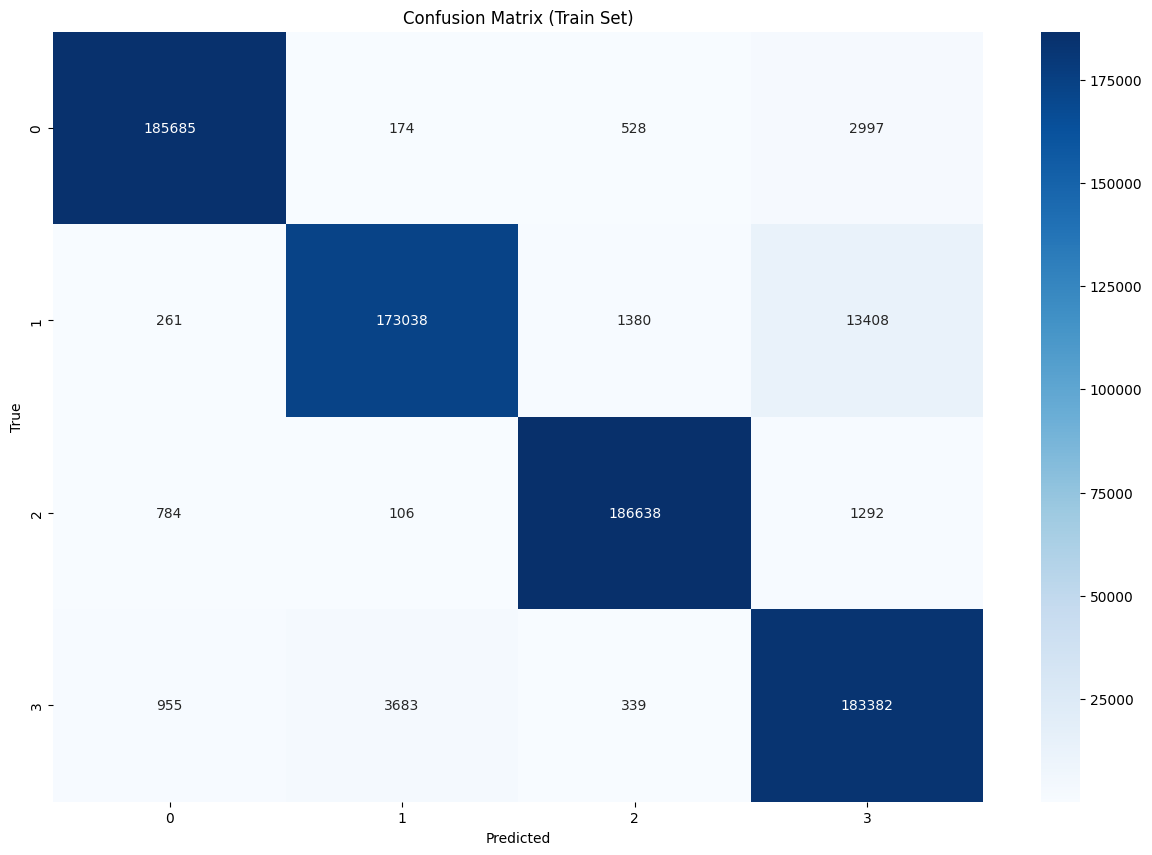

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.98      0.98    189384
     Class 1       0.98      0.92      0.95    188087
     Class 2       0.99      0.99      0.99    188820
     Class 3       0.91      0.97      0.94    188359

    accuracy                           0.97    754650
   macro avg       0.97      0.97      0.97    754650
weighted avg       0.97      0.97      0.97    754650



In [ ]:
# Predict classes for test data
y_pred = np.argmax(model.predict(X_test_tensor), axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_tensor, y_pred)

# Plot confusion matrix
# Plot Confusion Matrix Heatmap for Train Set
plt.figure(figsize=(15, 10))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Train Set)')
plt.show()


# Generate classification report
class_names = ["Class " + str(i) for i in range(num_classes)]  # Assuming num_classes is defined
print("Classification Report:")
print(classification_report(y_test_tensor, y_pred, target_names=class_names))


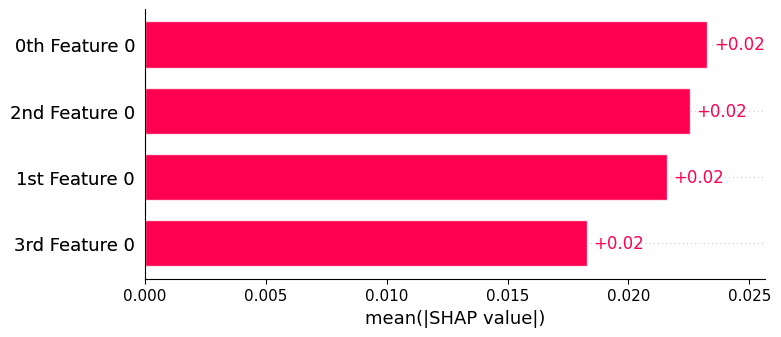

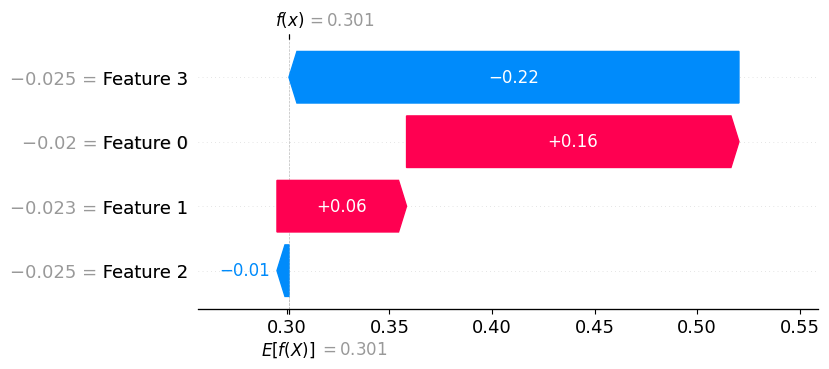

In [ ]:
import shap
import numpy as np

# Convert tensors to NumPy arrays
X_train_np = X_train_tensor.numpy()
X_test_np = X_test_tensor.numpy()

# Use a sample of training data as the background for the SHAP Explainer
explainer = shap.Explainer(model, X_train_np[:100])

# Compute SHAP values for 10 test samples
shap_values = explainer(X_test_np[:10])  # shape: (samples, classes, features)

# ✅ Aggregate SHAP values: mean absolute SHAP across all classes
mean_abs_vals = np.abs(shap_values.values).mean(axis=1)  # shape: (samples, features)

# ✅ Build an Explanation object from the aggregated values
aggregated_expl = shap.Explanation(
    values=mean_abs_vals,
    base_values=np.mean(shap_values.base_values, axis=1),  # shape: (samples,)
    data=shap_values.data,
    feature_names=shap_values.feature_names
)

# ✅ Plot bar chart of aggregated SHAP values
shap.plots.bar(aggregated_expl)

# ✅ Optional: plot waterfall for first sample, first class
single_expl = shap.Explanation(
    values=shap_values.values[0][0],  # First sample, first class
    base_values=shap_values.base_values[0][0],
    data=shap_values.data[0],
    feature_names=shap_values.feature_names
)

shap.plots.waterfall(single_expl)


In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=cf2259bd4b2fd004c462aeae6a0ef587d23e0c72e7473dc8e0f4802151be97c4
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted class probabilities:
Class 0: 0.0005
Class 1: 0.0001
Class 2: 0.9980
Class 3: 0.0014
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Explanation for class: Class 0
[('-0.02 <  Average Packet Size <= -0.02', -0.002119857019141432), ('Flow Bytes/s <= -0.88', -0.002066939303595289), (' Flow Packets/s <= -0.07', -0.002025623901034536), (' ACK Flag Count <= -0.03', 0.0020112973183697676), ('-0.02 <  Source Port <= -0.02', 0.0019468384446197447), (' Timestamp > -0.02', -0.001941199890184352), (' act_data_pkt_fwd > -0.02', -0.001866957630214691), ('-0.02 <  Avg Fwd Segment Size <= -0.02', 0.0017045804872320173), (' Protocol <= -0.03', 0.0016917504404895206), ('-0.02 <  Packet Length Mean <= -0.02', 0.0012781540772881194)]


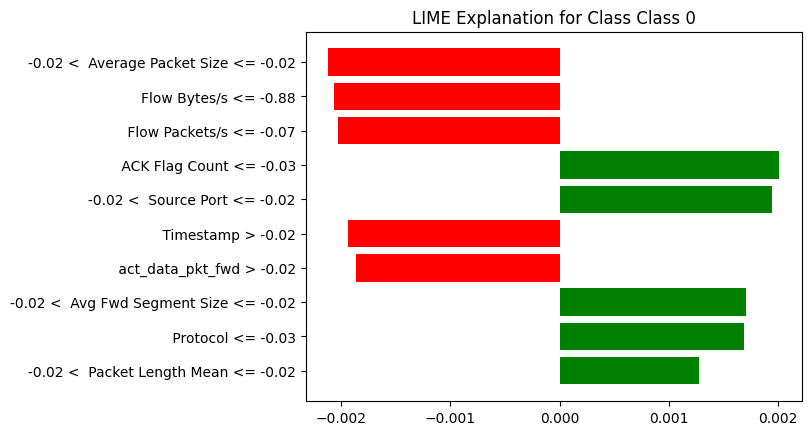


Explanation for class: Class 1
[('-0.02 <  Source Port <= -0.02', -0.006030119661048676), (' ACK Flag Count <= -0.03', -0.00503290511097756), ('-0.03 <  Min Packet Length <= -0.03', -0.004465648381696619), ('-0.02 <  Fwd Packet Length Max <= -0.02', -0.0042435210075631525), ('-0.02 <  Packet Length Mean <= -0.02', -0.0042254714785652904), (' Protocol <= -0.03', -0.004162202741841304), ('-0.02 <  Avg Fwd Segment Size <= -0.02', -0.002816287858996223), (' act_data_pkt_fwd > -0.02', 0.0026375184258445403), (' Timestamp > -0.02', 0.0025891605448600543), ('-0.02 <  Max Packet Length <= -0.02', -0.002547987915469087)]


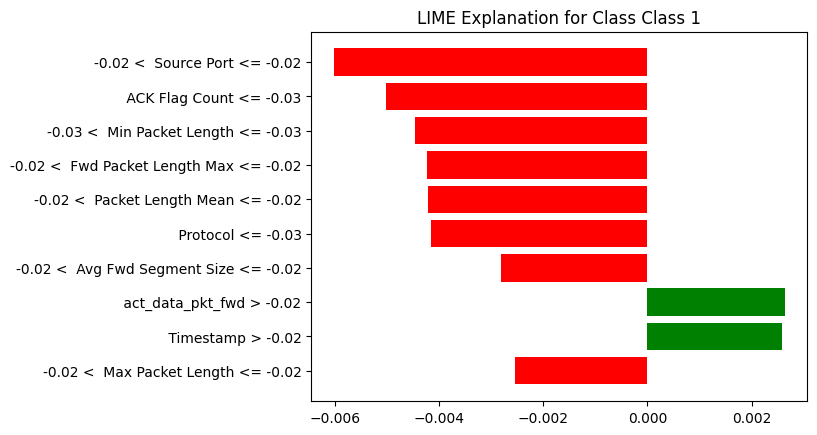


Explanation for class: Class 2
[('Flow Bytes/s <= -0.88', 0.003211494408760103), ('-0.03 <  Fwd Packet Length Min <= -0.03', 0.002797969203939166), ('-0.02 <  Source Port <= -0.02', 0.002587702255470929), ('-0.03 <  Min Packet Length <= -0.03', 0.0023730420571617993), ('-0.02 <  Max Packet Length <= -0.02', 0.002113697710255591), ('-0.02 <  Packet Length Mean <= -0.02', 0.0020687099273897884), (' Flow Packets/s <= -0.07', 0.0020451045507741804), ('-0.02 <  Destination Port <= -0.02', 0.0018980294270760617), ('-0.02 <  Average Packet Size <= -0.02', 0.001867931664229988), (' ACK Flag Count <= -0.03', 0.001826963906477088)]


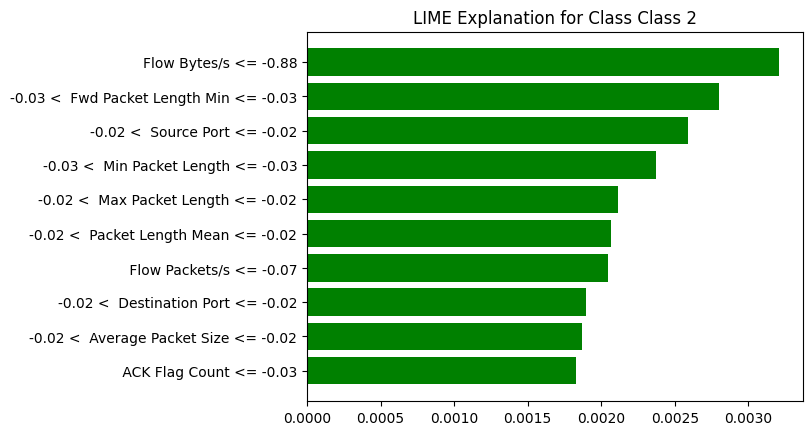


Explanation for class: Class 3
[('Flow ID <= -0.03', 0.002045897664305433), ('-0.02 <  Fwd Packet Length Max <= -0.02', 0.0019253643392555767), ('-0.03 <  Min Packet Length <= -0.03', 0.0016382497859395663), ('-0.02 <  Source Port <= -0.02', 0.0016207538569221601), ('-0.02 <  Fwd Packet Length Mean <= -0.02', 0.0015643614393607184), (' act_data_pkt_fwd > -0.02', -0.0010951864805299855), (' ACK Flag Count <= -0.03', 0.0010103188522659348), ('-0.02 <  Average Packet Size <= -0.02', -0.000904285120577597), ('-0.02 <  Packet Length Mean <= -0.02', 0.0008979487925410485), (' Flow Packets/s <= -0.07', 0.0008565343291124072)]


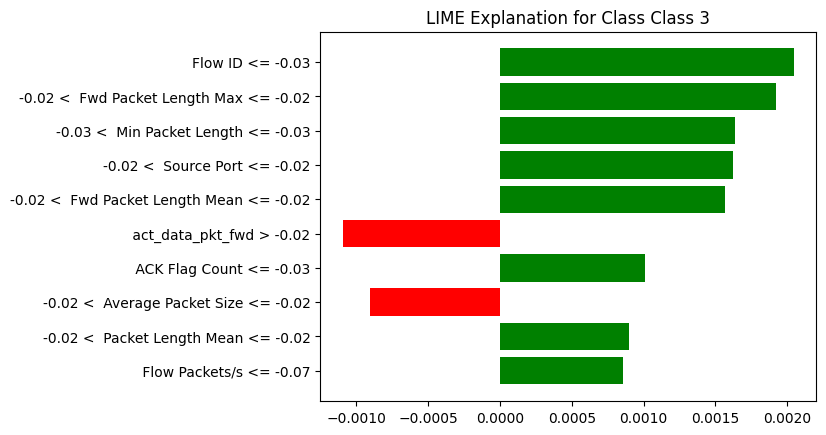

In [ ]:
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt

# Convert tensors to NumPy
X_train_np = X_train_tensor.numpy()
X_test_np = X_test_tensor.numpy()

# Define LIME explainer
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_np,
    feature_names=X.columns.tolist(),
    class_names=class_names,  # List of class names like ["Class 0", "Class 1", ...]
    mode='classification'
)

# Pick a test instance to explain
idx = 1
instance = X_test_np[idx]

# Predict once to get probabilities and class count
pred_probs = model.predict(instance.reshape(1, -1))[0]
num_classes = len(pred_probs)

print("Predicted class probabilities:")
for i, prob in enumerate(pred_probs):
    print(f"{class_names[i]}: {prob:.4f}")

# 🔧 Force LIME to generate explanations for all classes
exp = lime_explainer.explain_instance(
    data_row=instance,
    predict_fn=lambda x: model.predict(x),
    num_features=10,
    labels=list(range(num_classes))  # This is the FIX
)

# ✅ Loop over all classes and visualize explanations
for class_idx in range(num_classes):
    print(f"\nExplanation for class: {class_names[class_idx]}")

    # Show text summary
    print(exp.as_list(label=class_idx))

    # Plot explanation for this class
    fig = exp.as_pyplot_figure(label=class_idx)
    plt.title(f"LIME Explanation for Class {class_names[class_idx]}")
    plt.show()
